/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           109 non-null    object 
 1   COLOR.WYNE     109 non-null    int64  
 2   COLOR.YELLOW   109 non-null    int64  
 3   COLOR.V.PALE   109 non-null    int64  
 4   COLOR.PALE     109 non-null    int64  
 5   COLOR.P.GOLD   109 non-null    int64  
 6   COLOR.GOLD     109 non-null    int64  
 7   COLOR.O.GOLD   109 non-null    int64  
 8   COLOR.F.GOLD   109 non-null    int64  
 9   COLOR.BRONZE   109 non-null    int64  
 10  COLOR.P.AMBER  109 non-null    int64  
 11  COLOR.AMBER    109 non-null    int64  
 12  COLOR.F.AMBER  109 non-null    int64  
 13  COLOR.RED      109 non-null    int64  
 14  COLOR.SHERRY   109 non-null    int64  
 15  NOSE.AROMA     109 non-null    int64  
 16  NOSE.PEAT      109 non-null    int64  
 17  NOSE.SWEET     109 non-null    int64  
 18  NOSE.LIGHT

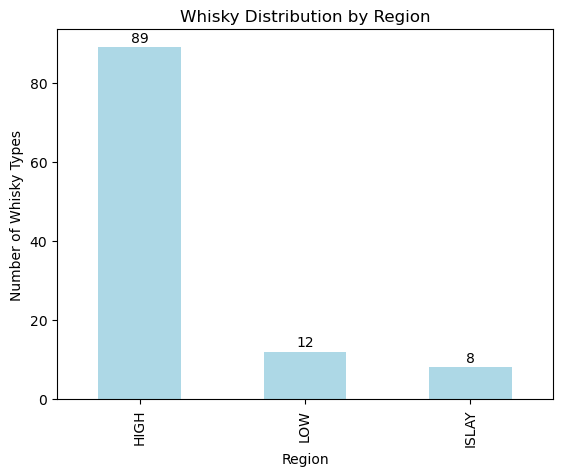

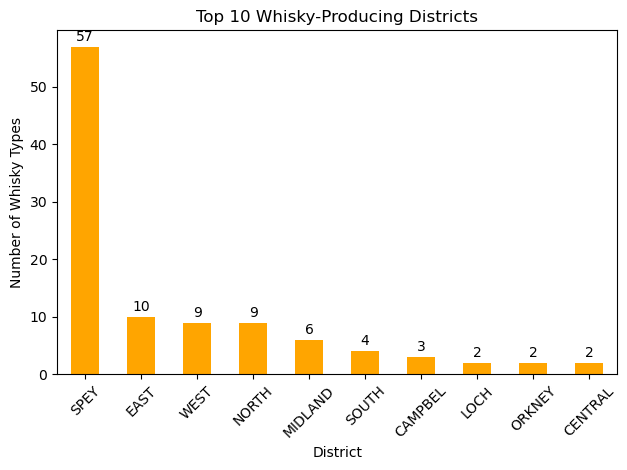

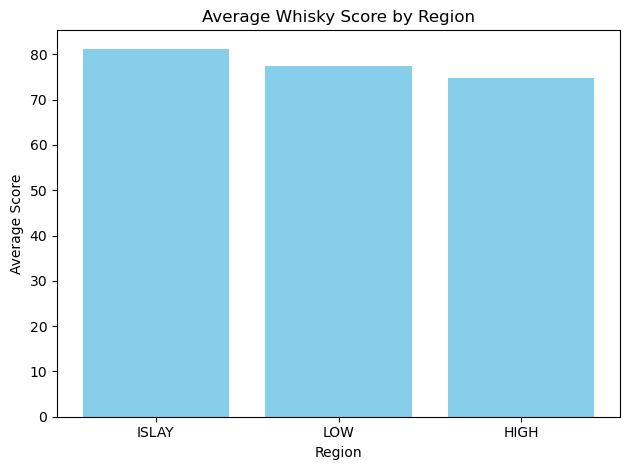

              AGE       SCORE           %
count  109.000000  109.000000  109.000000
mean    10.467890   75.587156   41.144037
std      2.295603    6.947170    2.672613
min      8.000000   55.000000   40.000000
25%      9.000000   71.000000   40.000000
50%     10.000000   76.000000   40.000000
75%     12.000000   79.000000   40.000000
max     20.000000   90.000000   57.100000


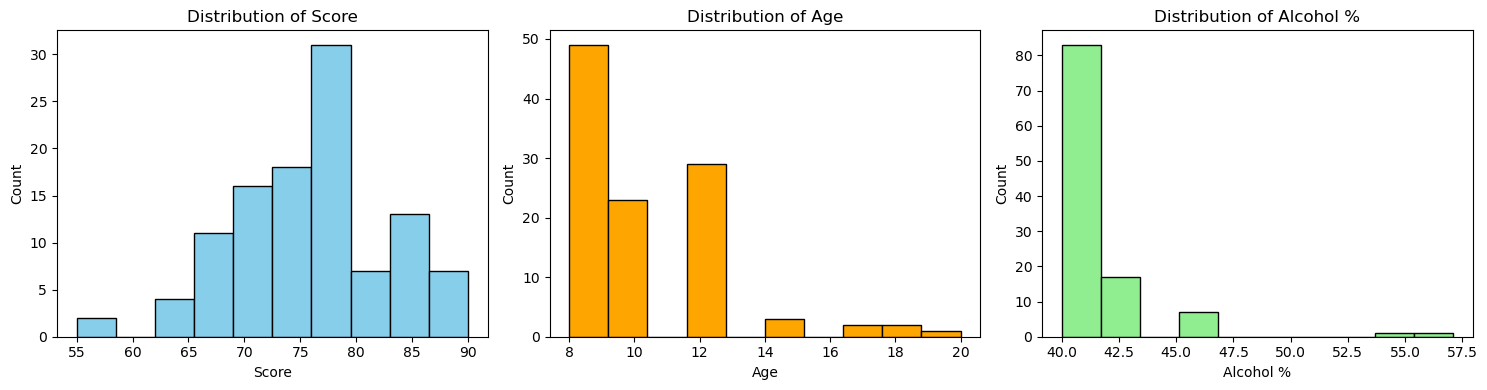

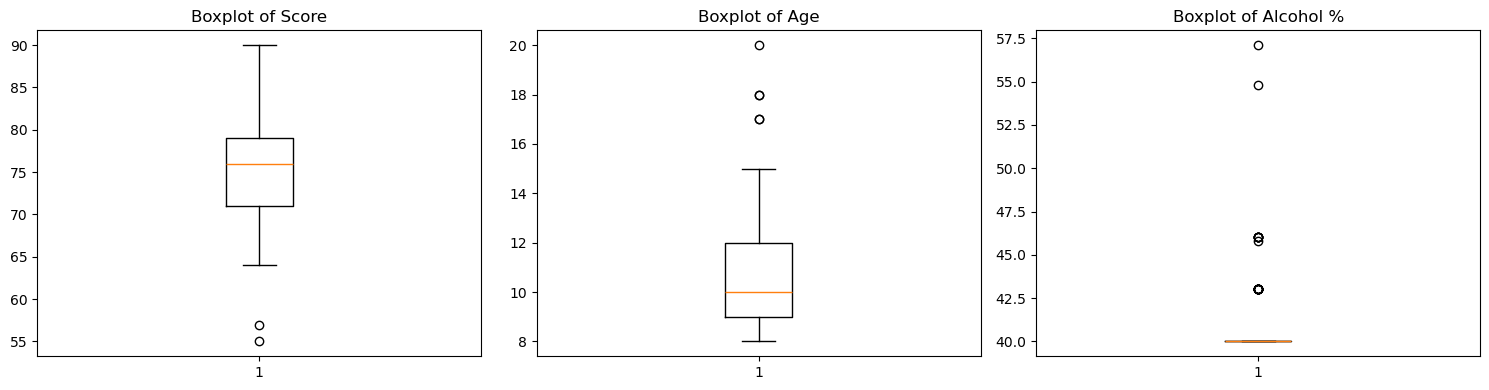


Correlation:
            AGE     SCORE         %
AGE    1.000000 -0.031320  0.342366
SCORE -0.031320  1.000000  0.037891
%      0.342366  0.037891  1.000000


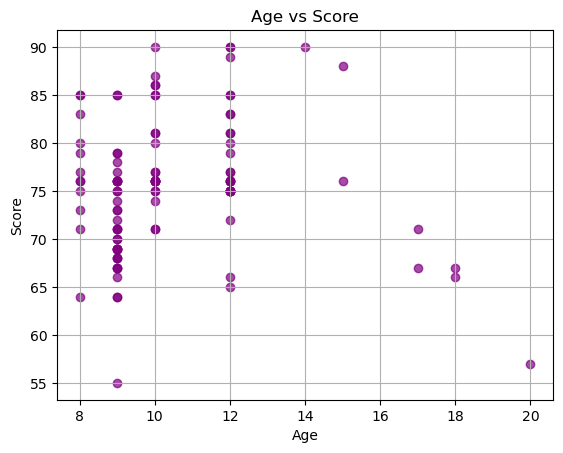

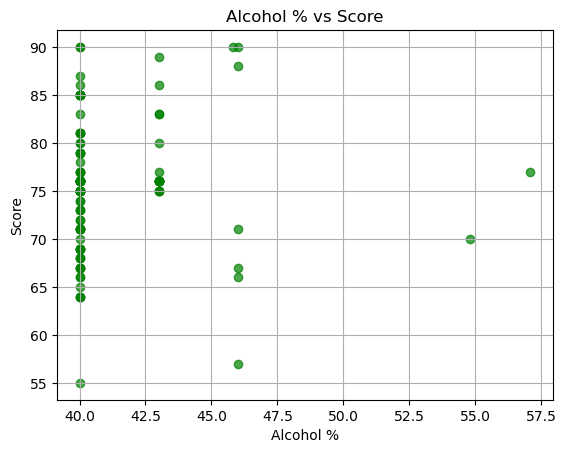

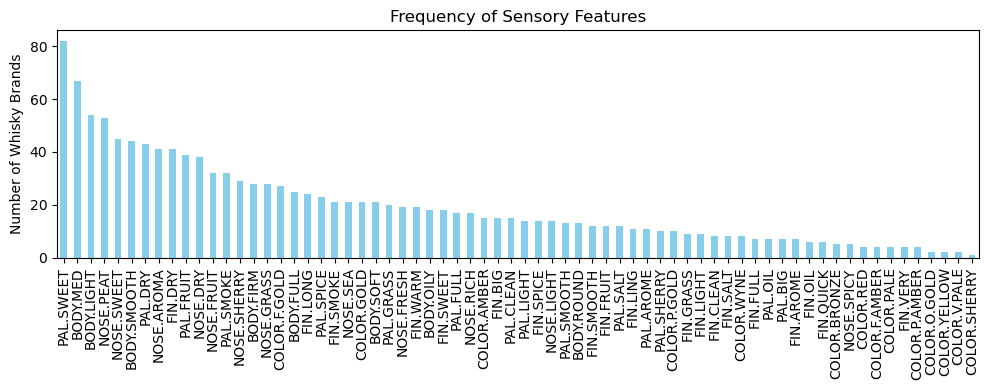

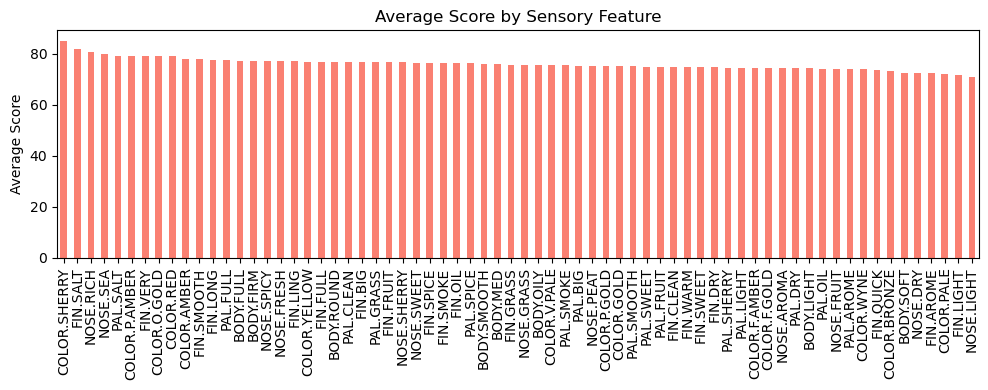

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.115
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.361
Time:                        06:58:42   Log-Likelihood:                -306.06
No. Observations:                 109   AIC:                             752.1
Df Residuals:                      39   BIC:                             940.5
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            65.3121     19.904      3.281

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


NAME                Springbank
REGION                     LOW
AGE                         15
%                         46.0
SCORE                       88
similarity_score             6
Name: 97, dtype: object

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

mydata = pd.read_excel()
df = pd.DataFrame(mydata)

#1. Data Preparation
print(df.info())
print(df.describe())
print(df[df.isna().any(axis=1)])
print(df[df.duplicated()])

#2. EDA
##2.1. Whisky Distribution by Region, District
###2.1.a Frequency
region_frequency = df['REGION'].value_counts()
print(region_frequency)
ax = region_frequency.plot(kind='bar', color='lightblue')
for i, v in enumerate(region_frequency.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.title('Whisky Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Whisky Types')
plt.savefig('region_plot.png', dpi=300, bbox_inches='tight')
plt.show()

district_frequency = df['DISTRICT'].value_counts()
district_frequency = district_frequency.head(10)
ax = district_frequency.plot(kind='bar', color='orange')
for i, v in enumerate(district_frequency.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Whisky-Producing Districts')
plt.xlabel('District')
plt.ylabel('Number of Whisky Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('district_plot.png', dpi=300, bbox_inches='tight')
plt.show()
###2.1.b. Average Score by Region
region_score_avg = df.groupby('REGION')['SCORE'].mean().sort_values(ascending=False)

bars = plt.bar(region_score_avg.index, region_score_avg.values, color='skyblue')
plt.title('Average Whisky Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.tight_layout()
plt.savefig('region_score_avg.png', dpi=300)
plt.show()

##2.2. Explore Age, %, Score
print(df[['AGE', 'SCORE', '%']].describe())
###2.2.a. Histogram
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df['SCORE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df['AGE'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df['%'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Alcohol %')
plt.xlabel('Alcohol %')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

###2.2.b. Boxplot for finding outliers
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.boxplot(df['SCORE'])
plt.title('Boxplot of Score')

plt.subplot(1, 3, 2)
plt.boxplot(df['AGE'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 3)
plt.boxplot(df['%'])
plt.title('Boxplot of Alcohol %')

plt.tight_layout()
plt.savefig('boxplot_plot.png', dpi=300, bbox_inches='tight')
plt.show()

###2.2.c. Correlation
correlation = df[['AGE', 'SCORE', '%']].corr()
print("\nCorrelation:")
print(correlation)

###2.2.d. Scatter plots
plt.scatter(df['AGE'], df['SCORE'], color='purple', alpha=0.7)
plt.title('Age vs Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('scatterplot_age_score.png', dpi=300, bbox_inches='tight')
plt.show()

plt.scatter(df['%'], df['SCORE'], color='green', alpha=0.7)
plt.title('Alcohol % vs Score')
plt.xlabel('Alcohol %')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('scatterplot_alcohol_score.png', dpi=300, bbox_inches='tight')
plt.show()

##2.3. Whisky’s Flavor 
###2.3.a. Flavor's Frequency
flavor_cols = [col for col in df.columns if col.startswith(('NOSE', 'PAL', 'FIN', 'BODY', 'COLOR'))]
flavor_freq = df[flavor_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
flavor_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of Sensory Features')
plt.ylabel('Number of Whisky Brands')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('flavor_frequency.png', dpi=300)
plt.show()

###2.3.b. Flavor's Average Score
flavor_score = df[flavor_cols].apply(lambda col: df.loc[col == 1, 'SCORE'].mean()).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
flavor_score.plot(kind='bar', color='salmon')
plt.title('Average Score by Sensory Feature')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('flavor_score_avg.png', dpi=300)
plt.show()

#3. Linear Regression Model
feature_cols = ['AGE', '%'] + [col for col in df.columns if col.startswith(('NOSE', 'PAL', 'FIN', 'BODY', 'COLOR'))]
X = df[feature_cols]
y = df['SCORE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print('\n=== Variance Inflation Factor (VIF) ===')
print(vif_df.sort_values('VIF', ascending=False).to_string())

#4. Cased Recommendation
flavor_cols = [col for col in df.columns if col.startswith(('NOSE', 'PAL', 'FIN', 'BODY', 'COLOR'))]

bunna = df[df['NAME'] == 'Bunnahabhain']
bunna_profile = bunna[flavor_cols].iloc[0]
bunna_traits = bunna_profile[bunna_profile == 1].index.tolist()

def count_similarity(row):
    return sum([row[trait] == 1 for trait in bunna_traits])
df['similarity_score'] = df.apply(count_similarity, axis=1)
df_recommend = df[df['NAME'] != 'Bunnahabhain']

df_top_matches = df_recommend.sort_values(by='similarity_score', ascending=False).head(5)
print(df_top_matches[['NAME', 'REGION', 'AGE', '%', 'SCORE', 'similarity_score']])

top_pick = df_top_matches.sort_values(by='SCORE', ascending=False).iloc[0]
top_pick[['NAME', 'REGION', 'AGE', '%', 'SCORE', 'similarity_score']]
